# This is the project for Kaggle

In [9]:
% reset
import numpy as np
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import pywt
from os import walk

from scipy.io import loadmat
import scipy
import numpy as np


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
num_ch = 0 #number of channels
raw_data_length = 0 #

def set_globvar_to_one():
    global num_ch    # Needed to modify global copy of globvar
    num_ch = 16
    global raw_data_length    # Needed to modify global copy of globvar
    raw_data_length = 400*60*10

def print_globvar():
    print(num_ch,raw_data_length)     # No need for global declaration to read value of globvar

set_globvar_to_one()
print_globvar()       # Prints 1

16 240000


## Following code read raw data files

In [11]:

mypath = './sample_data/train_1'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
file_path = []
for x in f:
    file_path.extend([dirpath+'/'+x])
ttnf = len(file_path)
print('total number of file found:',ttnf)


total number of file found: 443


In [12]:
# loadmat('./sample_data/train_2/1_45_1.mat')



In [ ]:

raw_sig = np.zeros((raw_data_length,num_ch,ttnf))

for i,fp in enumerate(file_path):
    print(fp)
    raw_data = loadmat(fp)['dataStruct']
    raw_sig[:,:,i] = raw_data[0][0][0]
#     np.append(raw_sig,raw_data[0][0][0],2)

## Following code handles the case when all channel returns zero
Lynn is going to do this part

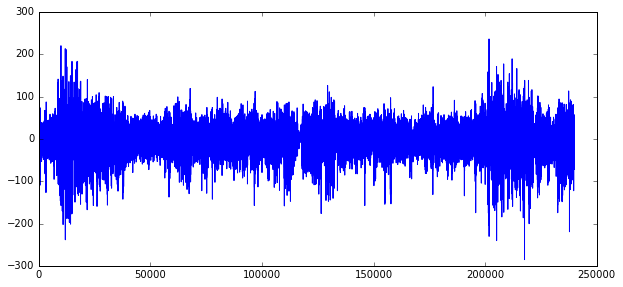

In [14]:
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

raw_sig.shape
sig = raw_sig[:,0,0]
plt.subplot(2,1,1)
plt.plot(sig)
plt.show()


## Following code extract features from signal using wavelet transform

In [15]:

def single_channel_dwt(sig):
#     input 240000
    coeffs = pywt.wavedec(sig, 'db1', level=6)
    cA2, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs
    return cD6

def multi_channel_dwt(sig):
#     input: 240000 * 16
#     return: k * 16
    F = []
    for s_sig in sig.T:
        cd = single_channel_dwt(s_sig)
        F.append(cd)
#     return np.asarray(F)
    return F

def feature_extraction(sig):
#     input: n * 240000 * 16
#     return: #files *channels * features
    FF = []
    for i in range(sig.shape[2]):
        F = multi_channel_dwt(raw_sig[:,:,1])
        FF.append(F)
    return FF

print(raw_sig.shape)
FF = feature_extraction(raw_sig) 

Y = []
for i,F in enumerate(FF):
    tmp = np.asarray(F)
    X = np.reshape(tmp,tmp.shape[0]*tmp.shape[1])
    Y.append(X)

(240000, 16, 443)


## Following code do dim reduction
Deepak can futher improve


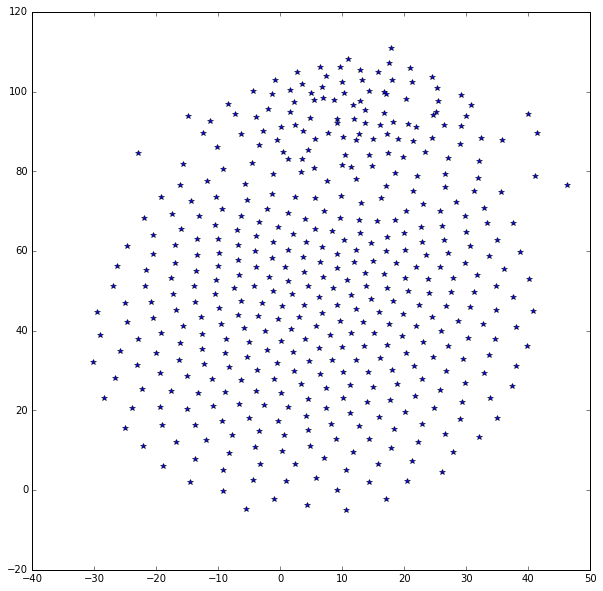

In [18]:
from sklearn.manifold import TSNE
X = np.asarray(Y)
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
T = model.fit_transform(X) 
# print(T)
plt.plot(T[:,0],T[:,1],'*')

## Following code do clustering 
Deepak can to do this

## Following code do classification